In [130]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("dataset.csv")

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       1258 non-null   int64  
 1   index         1258 non-null   int64  
 2   Date          1258 non-null   object 
 3   Open          1258 non-null   float64
 4   High          1258 non-null   float64
 5   Low           1258 non-null   float64
 6   Close         1258 non-null   float64
 7   Volume        1258 non-null   int64  
 8   Dividends     1258 non-null   float64
 9   Stock Splits  1258 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 98.4+ KB
None
           level_0        index         Open         High          Low  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean    628.500000   628.500000  2032.831319  2043.365820  2023.054053   
std     363.297628   363.297628   360.188989   363.833396   357.365322   
min       0.0

In [132]:
q_low = df['Close'].quantile(0.01)
q_high = df['Close'].quantile(0.99)
df = df[(df['Close'] >= q_low) & (df['Close'] <= q_high)]

In [133]:
df = df[['Date', 'Close']].copy()
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)

In [134]:
X = df[['Date_ordinal']].values
y = df['Close'].values

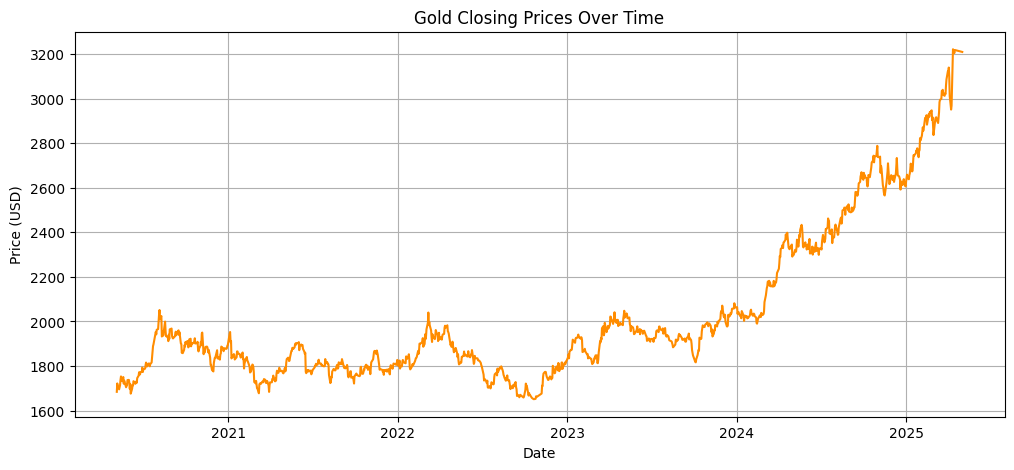

In [135]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], color='darkorange')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

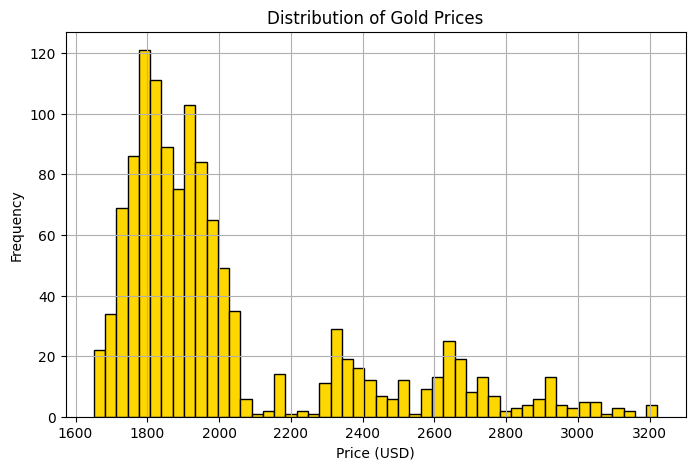

In [136]:
plt.figure(figsize=(8, 5))
plt.hist(df['Close'], bins=50, color='gold', edgecolor='black')
plt.title('Distribution of Gold Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [137]:
df['RollingMean_30'] = df['Close'].rolling(window=30).mean()
df['RollingStd_30'] = df['Close'].rolling(window=30).std()

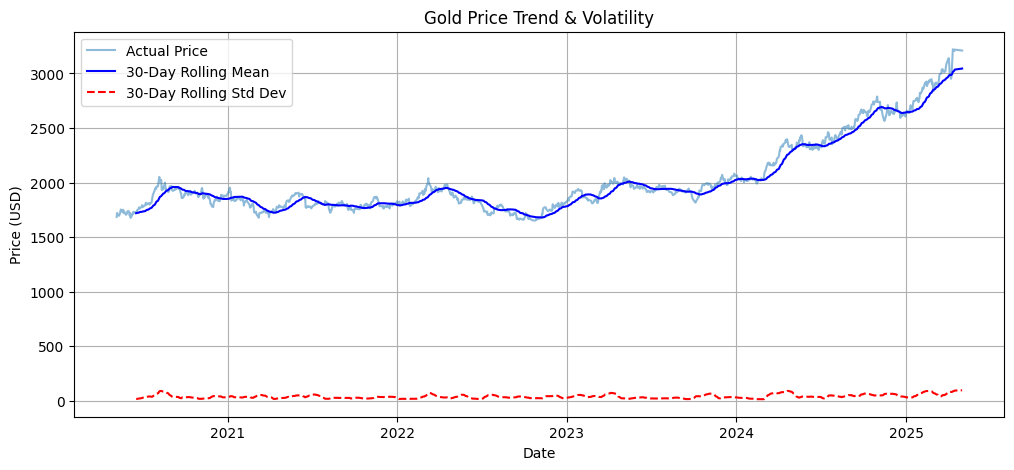

In [138]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], label='Actual Price', alpha=0.5)
plt.plot(df['Date'], df['RollingMean_30'], label='30-Day Rolling Mean', color='blue')
plt.plot(df['Date'], df['RollingStd_30'], label='30-Day Rolling Std Dev', color='red', linestyle='--')
plt.title('Gold Price Trend & Volatility')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
# Define features (X) and target variable (y)
X = df[['Date_ordinal']].values
y = df['Close'].values

In [140]:
# Create polynomial features (e.g., X, X^2, X^3 for degree=3)
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

In [141]:
# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [142]:
# Predict on the training data
y_pred = model.predict(X_poly)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict using the trained model
y_pred = model.predict(X_poly)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y, y_pred))
# Calculate R² Score
r2 = r2_score(y, y_pred)

# Print the results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Squared Error (RMSE): 105.35
R² Score: 0.9023


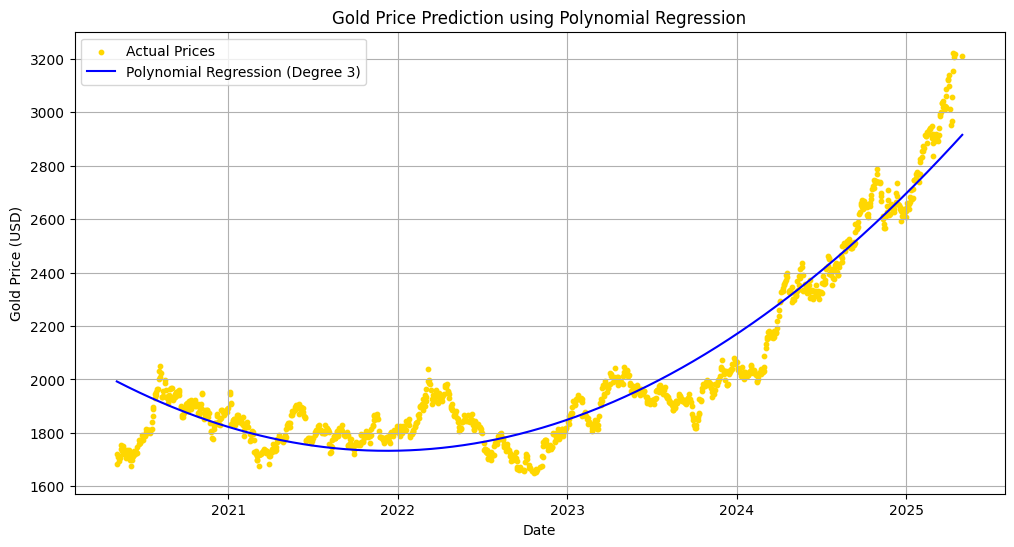

In [144]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], y, label='Actual Prices', color='gold', s=10)
plt.plot(df['Date'], y_pred, label=f'Polynomial Regression (Degree {degree})', color='blue')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.title('Gold Price Prediction using Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()